In [35]:
from __future__ import print_function, division
%run basics.ipynb

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Loading BokehJS ...

In [2]:
df = pd.read_pickle('udacity_courses.df')
print(len(df))
print(df.columns)
df.head(2)

129
Index([u'id', u'title', u'homepage', u'subtitle', u'level', u'starter',
       u'image', u'banner_image', u'teaser_video', u'summary',
       u'short_summary', u'required_knowledge', u'expected_learning',
       u'featured', u'syllabus', u'faq', u'full_course_available',
       u'expected_duration', u'expected_duration_unit', u'new_release',
       u'transcripts_url', u'transcripts_zip_fn', u'transcript'],
      dtype='object')


,id,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,...,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release,transcripts_url,transcripts_zip_fn,transcript
0,bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False,https://www.udacity.com/course/progress#!/c-bi...,transcripts_zips/bio110.zip,In the same way that our genomes influence tr...
1,cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False,https://www.udacity.com/course/progress#!/c-cs046,transcripts_zips/cs046.zip,"Hi, I'm Cay. I'm Sara. We'll be the instructo..."


In [3]:
df_prereq = pd.read_csv('udacity_prereq_graph.csv')
df_prereq.head(2)

,u_id,u_pre_req_id
0,cs222,cs101
1,cs222,ph100


In [4]:
print('self prereq:', (df_prereq['u_id'] == df_prereq['u_pre_req_id']).sum())

('self prereq:', 2)


In [5]:
print(df_prereq[df_prereq['u_id'] == 'ud257'])

     u_id u_pre_req_id
23  ud257        ud201
24  ud257        ud827


In [6]:
set_cids = set(df_prereq['u_pre_req_id'])
df_prereq['in_u_id'] = df_prereq['u_pre_req_id'].apply(lambda x: x in set_cids)
df_prereq['in_u_id'].value_counts()

True    118
Name: in_u_id, dtype: int64

In [7]:
prereq_counts = sorted(Counter(df_prereq['u_pre_req_id'].values).items(), key=itemgetter(1), reverse=True)
print(prereq_counts[:10])

[('ud775', 16), ('cs101', 13), ('ud853', 13), ('ud804', 8), ('ud036', 8), ('ud855', 8), ('ud304', 6), ('ud827', 5), ('ud201', 4), ('cs046', 4)]


In [8]:
df_prereq = pd.DataFrame(columns=[0], data=df_prereq.groupby(by='u_id').apply(lambda x: ' '.join(x['u_pre_req_id'].values)))

def resolve_course_titles(element, c_df):
    if isinstance(element, float):
        return np.nan
    t = np.nan
    try:
        t = c_df[c_df['id']==element].iloc[0]['title']
    except IndexError:
        pass
    return t

df_prereq['c_title'] = map(lambda x: resolve_course_titles(x, df), df_prereq.index)


def resolve_prereq_titles(element, c_df):
    if isinstance(element, float):
        return np.nan
    t = list()
    for i in element.split():
        try:
            t.append(c_df[c_df['id']==i].iloc[0]['title'])
        except IndexError:
            pass
    return ' ,'.join(t)

df_prereq['p_titles'] = df_prereq[0].apply(resolve_prereq_titles, args=(df ,))

In [9]:
for idx, row in df_prereq.iloc[:20].iterrows():
    print(row['c_title'])
    for p in row['p_titles'].split(','):
        print('\t', p)

Differential Equations in Action
('\t', 'Intro to Computer Science ')
('\t', 'Intro to Physics ')
('\t', 'Programming Foundations with Python')
Web Development
('\t', 'Intro to Computer Science ')
('\t', 'Programming Foundations with Python')
Intro to Artificial Intelligence
('\t', 'Intro to Statistics')
Intro to Theoretical Computer Science
('\t', 'Intro to Computer Science ')
('\t', 'Intro to Algorithms')
Artificial Intelligence for Robotics
('\t', 'Intro to Computer Science')
Firebase Essentials For Android
('\t', 'Firebase Essentials For Android')
Object-Oriented JavaScript
('\t', 'JavaScript Basics')
Intro to Machine Learning
('\t', 'Intro to Computer Science ')
('\t', 'Intro to Inferential Statistics ')
('\t', 'Intro to Data Science ')
('\t', 'How to Use Git and GitHub ')
('\t', 'Intro to Descriptive Statistics')
Intro to Data Analysis
('\t', 'Intro to Computer Science ')
('\t', 'Programming Foundations with Python')
Intro to Relational Databases
('\t', 'Programming Foundations w

In [10]:
df_prereq.drop(['p_titles', 'c_title'], inplace=True, axis=1)

In [11]:
def find_next_level_prereq(row, col, df):
    prereq = ''
    already_in = set()
    for i in row:
        if isinstance(i, float):
            break
        already_in.update(set(i.split()))
    last_element = row.iloc[-1]
    if isinstance(last_element, float):
        return np.nan
    # print(last_element)
    for i in last_element.split():
        try:
            new_prereq = df.at[i, col]
            if not isinstance(new_prereq, float):
                new_prereq = ' '.join(filter(lambda x: x not in already_in, new_prereq.split()))
                prereq += new_prereq
        except KeyError:
            pass
    if prereq == '':
        return np.nan
    return prereq

def add_prereq_level(df):
    max_level = max(df.columns)
    df[max_level + 1] = df.apply(find_next_level_prereq, args=(max_level, df), axis=1)

for i in range(2):
    add_prereq_level(df_prereq)
    print(df_prereq[df_prereq.columns[-1]].isnull().sum()/len(df_prereq))
df_prereq.head(10)

0
0


,0,1,2
u_id,,,
cs222,cs101 ph100 ud036,NaN,NaN
cs253,cs101 ud036,NaN,NaN
cs271,st101,NaN,NaN
cs313,cs101 cs215,NaN,NaN
cs373,cs101,NaN,NaN
ud009,ud009,NaN,NaN
ud015,ud804,cs101 ud036,NaN
ud120,cs101 ud201 ud359 ud775 ud827,ud595,ud036 ud197
ud170,cs101 ud036,NaN,NaN


In [12]:
df.head(2)

,id,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,...,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release,transcripts_url,transcripts_zip_fn,transcript
0,bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False,https://www.udacity.com/course/progress#!/c-bi...,transcripts_zips/bio110.zip,In the same way that our genomes influence tr...
1,cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False,https://www.udacity.com/course/progress#!/c-cs046,transcripts_zips/cs046.zip,"Hi, I'm Cay. I'm Sara. We'll be the instructo..."


In [13]:
pd.unique(df['level'])

array(['beginner', 'advanced', 'intermediate', nan], dtype=object)

In [14]:
from collections import defaultdict
c_level = defaultdict(lambda: 3, ((j, i) for i,j in enumerate(pd.unique(df['level']))))
c_level[np.nan] = 3
c_level['nan'] = 3
c_level

defaultdict(<function __main__.<lambda>>,
            {nan: 3,
             'advanced': 1,
             'beginner': 0,
             'intermediate': 2,
             'nan': 3})

In [15]:
#df['all-text'] = df['title'] + ' ' + df['subtitle'] + ' ' + df['description'] + ' ' + df['short_description'] + ' ' + df['syllabus']
cols = ['title', 'subtitle', 'summary', 'expected_learning', 'syllabus', 'transcript']
df['all-text'] = ''
for i in cols:
    df['all-text'] += df[i].astype('str')
    df['all-text'] += ' '
df['all-text'].tail(10)

119    JavaScript Promises Async Work Made Easy Learn...
120    Offline Web Applications Using IndexedDB & Ser...
121    Learn Swift Programming Syntax From Optionals ...
122    Educational Technology Offered at Georgia Tech...
123    Model Building and Validation Advanced Techniq...
124    Introduction to Operating Systems Offered at G...
125    Linear Algebra Refresher Course A Brief Refres...
126    Computational Photography Offered at Georgia T...
127    JavaScript Design Patterns Organizing Code in ...
128    Learn Backbone.js Write Organized JavaScript A...
Name: all-text, dtype: object

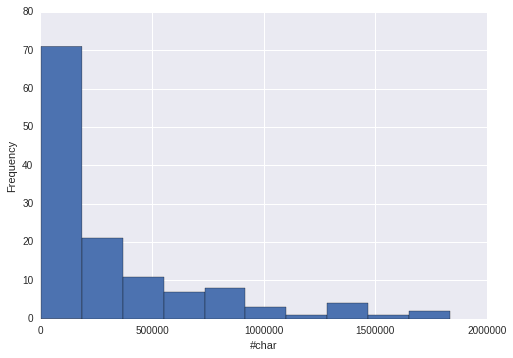

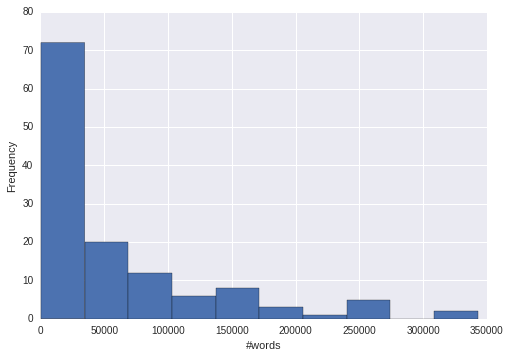

In [16]:
df['all-text'].apply(len).plot(kind='hist')
plt.xlabel('#char')
plt.show()
df['all-text'].apply(lambda x: len(x.split())).plot(kind='hist')
plt.xlabel('#words')
plt.show()

In [17]:
df['all-text-clean'] = df['all-text'].apply(text_cleanup, args=(None, 2))
df.to_pickle('udacity_all_text.df')
df['title'] = df['title'].apply(text_cleanup, args=(None, 2))
df['transcript'] = df['transcript'].apply(text_cleanup, args=(None, 2))

In [21]:
len(df)

129

In [33]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.1, ngram_range=(1, 1))
#vectorizer = CountVectorizer(stop_words='english', max_df=0.1, min_df=5)
vectorized_text = vectorizer.fit_transform(df['all-text-clean'].values)
print('tfidf shape:', vectorized_text.shape)

if False:
    from sklearn.decomposition import TruncatedSVD
    explained_var = list()
    comp_range = range(2, 1100, 100)
    shapes = list()
    for i in tqdm(reversed(comp_range)):
        svd = TruncatedSVD(n_components=i, n_iter=100)
        tmp = svd.fit_transform(vectorized_text)
        explained_var.append(svd.explained_variance_.sum())
        shapes.append(tmp.shape[1])
    pd.DataFrame(columns=['number of components', 'explained variance', 'true dim'], 
                 data=zip(comp_range, explained_var, shapes)).plot(x='number of components', secondary_y=['true dim'])
    plt.show()
    svd = TruncatedSVD(n_components=100, n_iter=100)
    vectorized_text = svd.fit_transform(vectorized_text)
else:
    vectorized_text = np.array(vectorized_text.todense())
print(type(vectorized_text))
print(vectorized_text.shape)
print(len(vectorized_text.shape))

('tfidf shape:', (129, 4735))
<type 'numpy.ndarray'>
(129, 4735)
2


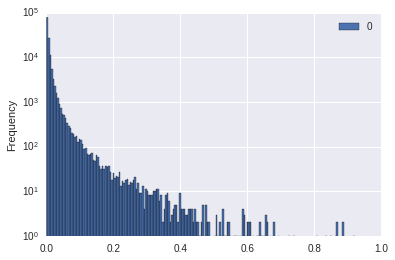

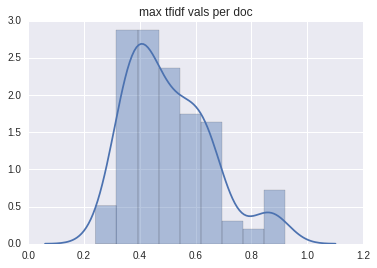

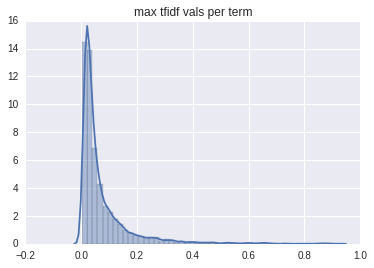

In [36]:
plot_tfidf_vals(vectorized_text)

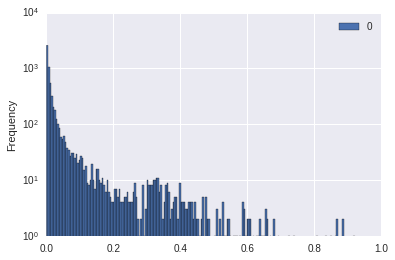

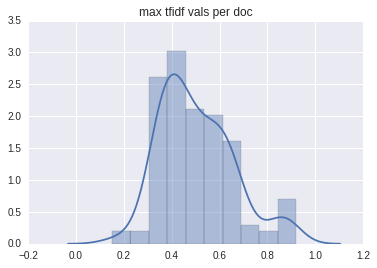

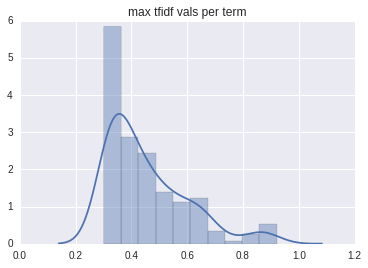

(129, 185)
[u'aligned' u'additive' u'allocating' u'addressing' u'afraid' u'accounted'
 u'animate' u'aggressive' u'altogether' u'advise' u'ab' u'analogous'
 u'adaptive' u'angle' u'alternating' u'alice' u'accurately' u'analyzing'
 u'allowing' u'aha']


In [40]:
vectorized_text, words = filter_tfidf_max(vectorized_text, vectorizer.get_feature_names(), min_th=.3, max_th=None)
plot_tfidf_vals(vectorized_text)
print(vectorized_text.shape)
print(np.random.choice(words, size=20))

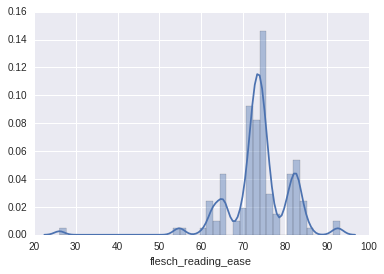

100%|██████████| 129/129 [22:21<00:00, 10.19s/it]


In [41]:
diffs = list()
title = 'title'
transcript = 'transcript'
description = 'summary'

textual_overlaps = [title, transcript, description]
overlap_names = [i + '->' + j for i in textual_overlaps for j in textual_overlaps]
overlap_combinations = [(i, j) for i in range(len(textual_overlaps)) for j in range(len(textual_overlaps))]

def overlap_agg_func(t1, t2):
    t1_bag = set(t1.split())
    return sum((i in t1_bag for i in t2.split()))

f_names = list()
tex_overlap_df = df[textual_overlaps]

df['flesch_reading_ease'] = df['all-text'].apply(textstat.flesch_reading_ease)
df['all_text_num_char'] = df['all-text'].apply(len)
df['all_text_num_word'] = df['all-text-clean'].apply(lambda x: len(x.split()))
sns.distplot(df['flesch_reading_ease'])
plt.show()
df['course_depth'] = df['level'].apply(lambda x: c_level[x])

for idx in tqdm(range(vectorized_text.shape[0])):
    v1 = vectorized_text[idx, :]
    v1_texts = tex_overlap_df.iloc[idx].values
    v1_min = v1.min()
    v1_max = v1.max()
    v1_mean = v1.mean()
    v1_median = np.median(v1)
    v1_count = (v1 > 0).sum()
    v1_n_chars = df['all_text_num_char'].iloc[idx]
    v1_n_words = df['all_text_num_word'].iloc[idx]
    v1_flesch = df['flesch_reading_ease'].iloc[idx]
    v1_depth = df['course_depth'].iloc[idx]
    for jdx in range(vectorized_text.shape[0]):
        v2 = vectorized_text[jdx, :]   
        v2_texts = tex_overlap_df.iloc[jdx].values
        overlaps_res = [overlap_agg_func(v1_texts[i], v2_texts[j]) for i,j in overlap_combinations]
        
        sim = (v1 * v2).sum() / ( np.sqrt((v1**2).sum()) * np.sqrt((v2**2).sum()) )
        euc_dist = np.sqrt(((v1-v2)**2).sum())
        man_dist = np.abs(v1-v2).sum()
        bin_diff = (v2 > v1).sum()
        max_diff = (v2 - v1).max()
        mean_diff = (v2 - v1).mean()
        median_diff = np.median(v2 - v1)
        
        v2_max = v2.max()
        v2_min = v2.min()
        v2_mean = v2.mean()
        v2_median = np.median(v2)
        v2_count = (v2 > 0).sum()
        v2_n_chars = df['all_text_num_char'].iloc[jdx]
        v2_n_words = df['all_text_num_word'].iloc[jdx]
        v2_flesch = df['flesch_reading_ease'].iloc[jdx]
        v2_depth = df['course_depth'].iloc[jdx]
        
        cons_idx = (v2 > 0.) & (v1 > 0.) & (v2 - 0.2 > v1)
        v1_filt = v1[cons_idx]
        v2_filt = v2[cons_idx]
        diff = (v2_filt - v1_filt).sum()
        depth_diff = v1_depth - v2_depth
        feature_values = [idx, jdx, diff, sim, euc_dist, man_dist, bin_diff, max_diff, mean_diff, median_diff, 
                          v1_max, v2_max, v1_min, v2_min, v1_mean, v2_mean, v1_median, v2_median, v1_count, 
                          v2_count, v1_n_chars, v1_n_words, v2_n_chars, v2_n_words, v1_flesch, v2_flesch, 
                          v1_depth, v2_depth, depth_diff, v1, v2]
        feature_values += overlaps_res
        diffs.append(tuple(feature_values))
    if idx == 0:
        f_names = ['idx', 'jdx', 'vec-diff', 'cos-sim', 'euc-dist', 'man-dist', 'bin_diff', 
                   'max_diff', 'mean_diff', 'median_diff',
                   'v1_max', 'v2_max', 'v1_min', 'v2_min', 
                   'v1_mean', 'v2_mean', 'v1_median', 'v2_median', 
                   'v1_count', 'v2_count', 'v1_n_chars', 'v1_n_words', 'v2_n_chars', 'v2_n_words',
                   'v1_flesch', 'v2_flesch', 'v1_depth', 'v2_depth', 'depth_diff', 'v1', 'v2']
        f_names += overlap_names

In [42]:
diff_df = pd.DataFrame(columns=f_names, data=diffs)
titles = df['title'].values
ids = df['id'].values
diff_df['c1'] = map(lambda x: titles[x], diff_df['idx'])
diff_df['c2'] = map(lambda x: titles[x], diff_df['jdx'])
diff_df['c_id'] = map(lambda x: ids[x], diff_df['idx'])
diff_df['prereq_id'] = map(lambda x: df.iloc[x][0], diff_df['jdx'])

In [43]:
df_prereq.head(1)

,0,1,2
u_id,,,
cs222,cs101 ph100 ud036,NaN,NaN


In [44]:
diff_df['ground-truth'] = map(lambda (x, y): x in df_prereq.index and y in ' '.join(filter(lambda p: isinstance(p, str), df_prereq[[0, 1, 2]].loc[x].values)), diff_df[['c_id', 'prereq_id']].values)
num_pos = diff_df['ground-truth'].sum()
num_neg = len(diff_df) - num_pos
print('pos groundtruth:', num_pos)
print('neg groundtruth:', num_neg)
diff_df.sort_values(by='vec-diff', inplace=True, ascending=False)

('pos groundtruth:', 189)
('neg groundtruth:', 16452)


In [45]:
print(diff_df['vec-diff'].min())
print(diff_df['vec-diff'].max())
print(diff_df.columns)
diff_df.to_pickle('clf.df')
diff_df.head(2)

0.0
1.81567426744
Index([u'idx', u'jdx', u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'v1_depth',
       u'v2_depth', u'depth_diff', u'v1', u'v2', u'title->title',
       u'title->transcript', u'title->summary', u'transcript->title',
       u'transcript->transcript', u'transcript->summary', u'summary->title',
       u'summary->transcript', u'summary->summary', u'c1', u'c2', u'c_id',
       u'prereq_id', u'ground-truth'],
      dtype='object')


,idx,jdx,vec-diff,cos-sim,euc-dist,man-dist,bin_diff,max_diff,mean_diff,median_diff,...,transcript->transcript,transcript->summary,summary->title,summary->transcript,summary->summary,c1,c2,c_id,prereq_id,ground-truth
9689,75,14,1.815674,0.100545,1.077885,3.973008,28,0.472877,0.001216,0.0,...,133370,19,2,37379,7,reinforcement learning,intro to theoretical computer science,ud600,cs313,False
13191,102,33,1.776448,0.071265,1.196877,4.573121,31,0.505149,0.002868,0.0,...,15090,81,0,5333,43,developing scalable apps in java,full stack foundations,ud859,ud088,False


In [30]:
diff_df[diff_df['ground-truth']>0].head(10)

,idx,jdx,vec-diff,cos-sim,euc-dist,man-dist,bin_diff,max_diff,mean_diff,median_diff,...,transcript->transcript,transcript->summary,summary->title,summary->transcript,summary->summary,c1,c2,c_id,prereq_id,ground-truth
8696,67,53,1.657688,0.103480,1.339044,33.780440,29,0.602820,-0.002963,0.0,...,0,129,2,0,58,data visualization and js,intro to html and css,ud507,ud304,True
12354,95,99,1.188527,0.193634,1.269934,34.947730,1522,0.590558,-0.000167,0.0,...,55470,39,0,16740,27,android performance,developing android apps,ud825,ud853,True
6632,51,53,1.014109,0.052701,1.376444,20.092650,29,0.674391,-0.001396,0.0,...,0,111,2,0,52,html canvas,intro to html and css,ud292,ud304,True
7267,56,43,0.973504,0.156847,1.298579,28.563131,1308,0.746762,-0.000660,0.0,...,55211,28,1,14490,9,intro to data science,intro to inferential statistics,ud359,ud201,True
15146,117,53,0.913786,0.038690,1.386586,23.803525,29,0.633736,-0.001771,0.0,...,0,120,2,0,74,responsive web design fundamentals,intro to html and css,ud893,ud304,True
4998,38,96,0.897283,0.113321,1.331675,28.140791,905,0.897283,-0.001521,0.0,...,39182,35,2,12222,21,intro to machine learning,intro to descriptive statistics,ud120,ud827,True
12352,95,97,0.846989,0.344820,1.144710,37.907424,3225,0.408384,0.000500,0.0,...,128954,130,1,39414,71,android performance,android development for beginners,ud825,ud837,True
8214,63,87,0.833504,0.136574,1.314097,34.733473,657,0.833504,-0.001814,0.0,...,18093,34,0,4855,16,ios networking with swift,uikit fundamentals,ud421,ud788,True
7320,56,96,0.822095,0.178272,1.281973,25.397815,1092,0.822095,-0.001105,0.0,...,38542,35,1,10096,19,intro to data science,intro to descriptive statistics,ud359,ud827,True
4945,38,43,0.821950,0.081726,1.355193,31.034048,1112,0.821950,-0.001076,0.0,...,55056,30,2,17257,12,intro to machine learning,intro to inferential statistics,ud120,ud201,True


In [31]:
diff_df.groupby(by='ground-truth').describe()

bin_diff       cos-sim    depth_diff      euc-dist  \
ground-truth                                                                 
False        count  16452.000000  16452.000000  16452.000000  16452.000000   
             mean    1329.474167      0.085356     -0.011245      1.346382   
             std     1003.578964      0.102505      1.169926      0.128632   
             min        0.000000      0.000000     -3.000000      0.000000   
             25%      612.000000      0.040611     -1.000000      1.342956   
             50%     1038.000000      0.063036      0.000000      1.368915   
             75%     1925.000000      0.098235      1.000000      1.385199   
             max     5290.000000      1.000000      3.000000      1.414214   
True         count    189.000000    189.000000    189.000000    189.000000   
             mean    1558.677249      0.168698      0.978836      1.268424   
             std     1199.599555      0.178734      1.061701      0.232356   
             min        0.000000      0.008653     -2.000000      0.000000   
             25%      669.000000      0.065844      0.000000      1.271642   
             50%     1036.000000      0.111953      1.000000      1.332702   
             75%     2949.000000      0.191464      2.000000      1.366862   
             max     3999.000000      1.000000      2.000000      1.408082   

                             idx           jdx      man-dist      max_diff  \
ground-truth                                                                 
False        count  16452.000000  16452.000000  16452.000000  16452.000000   
             mean      63.861719     64.075310     38.948895      0.413466   
             std       37.290744     37.230217      8.533118      0.164412   
             min        0.000000      0.000000      0.000000      0.000000   
             25%       31.000000     32.000000     33.839092      0.292505   
             50%       64.000000     64.000000     39.240729      0.388275   
             75%       96.000000     96.000000     44.678025      0.517783   
             max      128.000000    128.000000     61.221108      0.902728   
True         count    189.000000    189.000000    189.000000    189.000000   
             mean      76.037037     57.444444     36.323930      0.429188   
             std       30.165037     37.526775      9.970457      0.171249   
             min        5.000000      1.000000      0.000000      0.000000   
             25%       54.000000     31.000000     31.686505      0.342200   
             50%       76.000000     68.000000     35.711943      0.361688   
             75%      106.000000     89.000000     42.400288      0.554867   
             max      128.000000    127.000000     57.290965      0.902728   

                       mean_diff   median_diff      ...           v2_count  \
ground-truth                                        ...                      
False        count  16452.000000  1.645200e+04      ...       16452.000000   
             mean      -0.000002  1.088866e-07      ...        1481.709944   
             std        0.001149  2.530486e-04      ...        1143.694775   
             min       -0.004127 -2.275712e-03      ...          27.000000   
             25%       -0.000762  0.000000e+00      ...         664.000000   
             50%        0.000000  0.000000e+00      ...        1124.000000   
             75%        0.000758  0.000000e+00      ...        2184.000000   
             max        0.004127  2.275712e-03      ...        5297.000000   
True         count    189.000000  1.890000e+02      ...         189.000000   
             mean       0.000214 -9.478319e-06      ...        1793.915344   
             std        0.001130  1.303053e-04      ...        1339.164575   
             min       -0.002963 -1.791402e-03      ...          29.000000   
             25%       -0.000445  0.000000e+00      ...         750.000000   
             50%        0.000177  0.000000e+

In [32]:
diff_df[diff_df['diff']!=0]['diff'].plot(kind='hist', bins=200)
plt.show()
diff_df[diff_df['diff']>0]['diff'].plot(kind='hist', bins=200)
plt.show()

KeyError: 'diff'

In [ ]:
def filter_top_prereq(df):
    s_df = df.sort_values(by='diff', ascending=True)
    return s_df[s_df['diff']>0.5].copy()
    #return s_df.iloc[-3:]

prereq = pd.DataFrame(diff_df.groupby(by='c1').apply(filter_top_prereq))
prereq

In [ ]:
prereq.head(2)

In [ ]:
df_prereq.head(2)

In [ ]:
def get_true_prereq_level((c_id, prereq_id), prereq_df):
    try:
        true_prereq = prereq_df.loc[c_id]
    except KeyError:
        return 0
    prereq_level = 0
    #print('---------')
    #print(df[df['id'] == c_id]['title'].iloc[0])
    #print(df[df['id'] == prereq_id]['title'].iloc[0])
    for idx, ids in enumerate(true_prereq.values):
        if isinstance(ids, float):
            continue
        #try:    
            #print(map(lambda x: df[df['id'] == x]['title'].iloc[0], ids.split()))
        #except:
        #    pass
        if prereq_id in ids.split():
            prereq_level = idx + 1
    #print(prereq_level)
    return prereq_level

In [ ]:
#prereq[['c_id', 'prereq_id']].iloc[:100].apply(get_true_prereq_level, args=(df_prereq,), axis=1)

In [ ]:
prereq['prereq_level'] = prereq[['c_id', 'prereq_id']].apply(get_true_prereq_level, args=(df_prereq,), axis=1)
prereq['prereq_level'].plot(kind='hist')
plt.show()
prereq[['prereq_level', 'diff']].groupby(by='prereq_level').describe()

In [ ]:
prereq[prereq['prereq_level'] == 0].sort_values(by='diff', ascending=False).head(100)

In [ ]:
prereq['rnd_prereq_id'] = np.random.choice(df['id'].values, size=len(prereq), replace=True)
prereq['rnd_prereq_id'].head(2)

In [ ]:
prereq['rnd_prereq_level'] = prereq[['c_id', 'rnd_prereq_id']].apply(get_true_prereq_level, args=(df_prereq,), axis=1)
prereq['rnd_prereq_level'].plot(kind='hist')
plt.show()

In [ ]:
prereq[prereq['prereq_level']==1]

In [ ]:
prereq[prereq['rnd_prereq_level']>0]

In [ ]:
a = '2D Game Development with libGDX'
b = 'Intro to Physics'
a_idx = df[df['title'] == a].index[0]
b_idx = df[df['title'] == b].index[0]

In [ ]:
def get_tfidf_df(vec, vectorizer):
    df = pd.DataFrame(columns=['tfidf-val'], data=vec)
    df['word'] = vectorizer.get_feature_names()
    return df

In [ ]:
a_df = get_tfidf_df(vectorized_text[a_idx, :], vectorizer)
a_df.sort_values(by='tfidf-val', ascending=False).head(10)

In [ ]:
a_df[a_df['tfidf-val']>0].sort_values(by='tfidf-val').head(10)

In [ ]:
b_df = get_tfidf_df(vectorized_text[b_idx, :], vectorizer)
b_df.sort_values(by='tfidf-val').tail(10)

In [ ]:
filt = (a_df['tfidf-val'] > 0) & (b_df['tfidf-val'] > 0)
a_df = a_df[filt]
b_df = b_df[filt]
a_df['diff'] = a_df['tfidf-val'] - b_df['tfidf-val']
a_df.sort_values(by='diff')